In [1]:
# load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Rainfall_and_Streamflow_Dataset.csv')

In [3]:
# Create lag features
data['lag1_precip'] = data['precipitation_mm'].shift(1).fillna(0)
data['lag2_precip'] = data['precipitation_mm'].shift(2).fillna(0)
data['lag3_precip'] = data['precipitation_mm'].shift(3).fillna(0)

In [4]:
# Add day and month 
data['day'] = pd.to_datetime(data['date']).dt.day
data['month'] = pd.to_datetime(data['date']).dt.month

In [5]:
# Define features and target
features = ['precipitation_mm', 'lag1_precip', 'lag2_precip', 'lag3_precip', 'day', 'month']
target = 'streamflow_cms'

In [6]:
X = data[features]
y = data[target]

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.13766666666666671
R^2 Score: 0.610486792452829


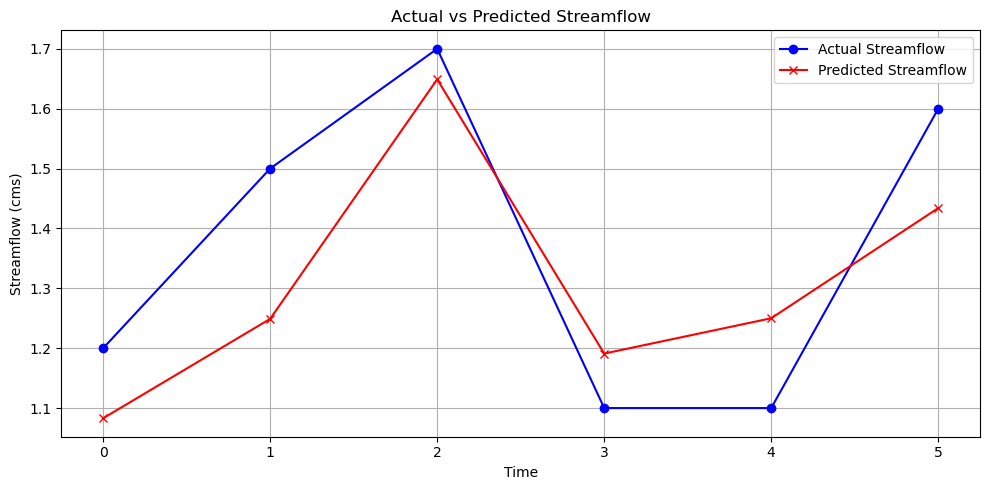

In [10]:
# plotting the results
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Streamflow', color='blue', marker='o')
plt.plot(y_pred, label='Predicted Streamflow', color='red', marker='x')
plt.title('Actual vs Predicted Streamflow')
plt.xlabel('Time')
plt.ylabel('Streamflow (cms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close() # End of code snippet

In [11]:
# Just with lag1 features
features_lag1 = ['precipitation_mm','lag1_precip', 'day', 'month']
X_lag1 = data[features_lag1]
y_lag1 = data[target]

In [12]:
#  train-test split
X_train_lag1, X_test_lag1, y_train_lag1, y_test_lag1 = train_test_split(X_lag1, y_lag1, test_size=0.2, random_state=42)


In [13]:
model_lag1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_lag1.fit(X_train_lag1, y_train_lag1)
y_pred_lag1 = model_lag1.predict(X_test_lag1)

In [14]:
# Evaluate the lag1 model
mae_lag1 = mean_absolute_error(y_test_lag1, y_pred_lag1)
r2_lag1 = r2_score(y_test_lag1, y_pred_lag1)
print(f'Lag1 Model - Mean Absolute Error: {mae_lag1}')
print(f'Lag1 Model - R^2 Score: {r2_lag1}')

Lag1 Model - Mean Absolute Error: 0.14133333333333342
Lag1 Model - R^2 Score: 0.5440113207547164


In [16]:
# Compare the lag1, lag2, and lag3 and just lag1 models, Evaluate the performance
print(f'Lag1 Model - Mean Absolute Error: {mae_lag1}')
print(f'Full Model (lag1, lag2 and lag3) - Mean Absolute Error: {mae}')
print(f'Lag1 Model - R^2 Score: {r2_lag1}')
print(f'Full Model (lag1, lag2 and lag3) - R^2 Score: {r2}')
print(f'Improvement in MAE: {mae - mae_lag1}')
print(f'Improvement in R^2: {r2 - r2_lag1}')


Lag1 Model - Mean Absolute Error: 0.14133333333333342
Full Model (lag1, lag2 and lag3) - Mean Absolute Error: 0.13766666666666671
Lag1 Model - R^2 Score: 0.5440113207547164
Full Model (lag1, lag2 and lag3) - R^2 Score: 0.610486792452829
Improvement in MAE: -0.003666666666666707
Improvement in R^2: 0.06647547169811263


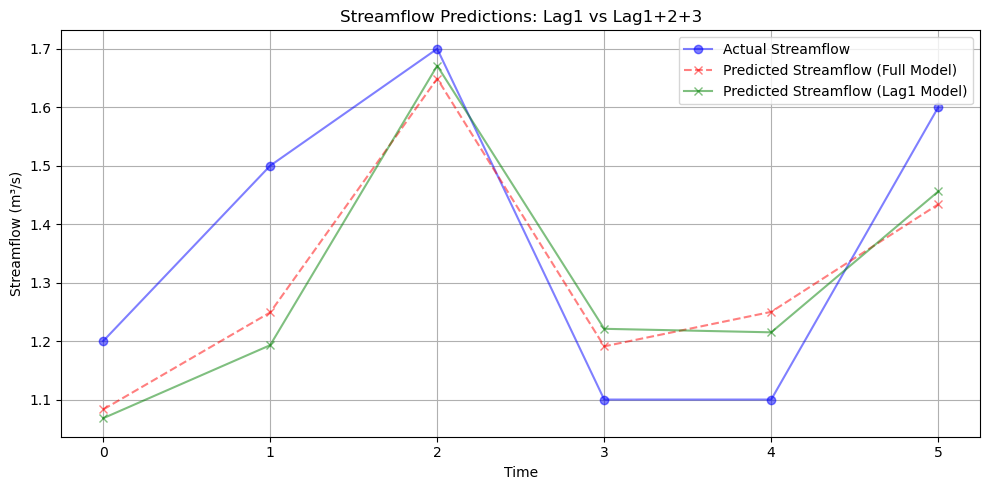

In [21]:
# plot the results for full model (lag1, lag2 and lag3) with lag1 model
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Streamflow', color='blue', marker='o', alpha=0.5)
plt.plot(y_pred, label='Predicted Streamflow (Full Model)', color='red', marker='x', linestyle='--', alpha=0.5)
plt.plot(y_pred_lag1, label='Predicted Streamflow (Lag1 Model)', color='green', marker='x', linestyle='-', alpha=0.5)
plt.title('Streamflow Predictions: Lag1 vs Lag1+2+3')
plt.xlabel('Time')
plt.ylabel('Streamflow (m³/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()  # End of code snippet